In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,precision_score, precision_recall_curve, recall_score, roc_curve, auc, confusion_matrix,classification_report
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
data = load_svmlight_file('data/demo-g3-v2.txt')
X,y=data[0],data[1]
X_s,y_s=resample(X,y,n_samples=100000,replace=False)
X_train,X_test,y_train,y_test = train_test_split(X_s,y_s,test_size=.3,random_state=42)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded=le.fit_transform(y_train)
y_train_encoded
y_test_encoded = le.transform(y_test)

In [3]:
def model_eva(model,X_test,y_test):
    y_test_pred=model.predict(X_test)
    print('precision_score:',precision_score(y_test,y_test_pred,average='macro'))
    print(confusion_matrix(y_test,y_test_pred).T)
    print(np.unique(y_test,return_counts=True))
    print(np.unique(y_test_pred,return_counts=True))
    print(classification_report(y_test,y_test_pred))
    print("******************************************************************")

In [7]:
pca=PCA(n_components=100,svd_solver='randomized')
X_train_array=X_train.toarray()
pca.fit(X_train_array)
X_train_pca=pca.transform(X_train_array)

In [8]:
xgb_clf_raw = xgb.XGBClassifier(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=8,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)
xgb_clf_raw.fit(X_train_pca,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.01,
       max_delta_step=0, max_depth=8, min_child_weight=1.5, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0.9,
       reg_lambda=0.6, scale_pos_weight=1, seed=42, silent=1,
       subsample=0.2)

In [16]:
# xgb_clf = xgb.XGBClassifier(
#                  colsample_bytree=0.2,
#                  gamma=0.0,
#                  learning_rate=0.01,
#                  max_depth=8,
#                  min_child_weight=1.5,
#                  n_estimators=1000,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
#                  seed=42,
#                  silent=1)
xgb_clf = xgb.XGBClassifier(
                 colsample_bytree=0.2,
#                  gamma=0.0,
                 learning_rate=0.01,
                 max_depth=8,
#                  min_child_weight=1.5,
                 n_estimators=1000,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
                 seed=42,
                 silent=1)
xgb_clf.fit(X_train_pca,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=1,
       subsample=1)

In [10]:
X_test_array=X_test.toarray()
X_test_pca=pca.transform(X_test_array)

In [9]:
def test(model):
    model_eva(model,X_train_pca,y_train)
    model_eva(model,X_test_pca,y_test) 

In [11]:
test(xgb_clf_raw)

precision_score: 0.6495335349074474
[[1462  336  320  320  303  219  185  134  103   78  105]
 [  48  532   46   48   42   38   26   20   13   12   15]
 [ 189  230 2253  281  260  240  211  172  131   92  140]
 [ 142  152  269 3421  279  283  281  246  205  145  158]
 [ 276  262  493  482 4574  473  541  481  397  351  343]
 [ 216  242  487  452  422 4513  436  501  405  412  343]
 [  50   59  114  109   97   84 2836  109   91   97   71]
 [  16   27   47   48   43   23   31 2086   30   31   14]
 [   8    4   19   21   23   26   24   23 1542   18   17]
 [   3    6   10   11   17   14   15   12   11 1391   17]
 [ 286  288  673  801  955 1058 1106 1137 1150 1174 6740]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([2696, 2138, 4731, 5994, 7015, 6971, 5692, 4921, 4078, 3801, 7963]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([ 3565,   840,  4199,  5581,  8673,  8429,  3717,  2396,  1725,
        1507, 15368]))
              precision    

In [20]:
test(xgb_clf)

precision_score: 0.7611078475149125
[[1937  358  371  293  279  242  205  179  119   63  120]
 [  24 1074   25   21   22   21   22   20   11    9   11]
 [ 142  151 2876  154  172  174  163  111   85   69   90]
 [ 191  213  327 4387  353  355  337  270  201  132  158]
 [ 121  119  269  234 4920  258  357  329  232  197  169]
 [  82   97  216  207  183 4813  204  194  150  163  118]
 [  23   20   68   71   66   68 3662   65   49   49   36]
 [   8    3    8   20   28   17   15 2946   20   17   15]
 [   0    0    7   14    6   11    8   15 2499    8    9]
 [   4    0    9    8   10    8    8    9   12 2287    9]
 [ 161  152  526  618  790  845  855  863  773  714 7319]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([2693, 2187, 4702, 6027, 6829, 6812, 5836, 5001, 4151, 3708, 8054]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([ 4166,  1260,  4187,  6924,  7205,  6427,  4177,  3097,  2577,
        2364, 13616]))
              precision    

In [3]:
xgb_clf_1000_8_raw = xgb.XGBClassifier(
                 colsample_bytree=0.2,
#                  gamma=0.0,
                 learning_rate=0.1,
                 max_depth=8,
#                  min_child_weight=1.5,
                 n_estimators=1000,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
                 seed=42,
                 silent=1)
xgb_clf_1000_8_raw.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=1,
       subsample=1)

In [6]:
model_eva(xgb_clf_1000_8_raw,X_train,y_train)
model_eva(xgb_clf_1000_8_raw,X_test,y_test) 

precision_score: 0.6104409877562791
[[1681  412  446  358  340  256  197  143  123   91  148]
 [  60  778   62   63   64   50   40   34   14   11   15]
 [ 154  146 2126  286  263  260  201  128   97   86  106]
 [  93  123  344 3038  435  414  337  231  177  143  156]
 [ 288  265  660  812 4157  885  810  629  434  311  381]
 [ 138  136  372  479  539 3703  565  460  410  329  289]
 [  25   32   78  106  128  137 2250  114  105   92   86]
 [  21   18   32   58   76   66   68 1891   61   52   50]
 [  11   12   23   38   31   32   30   42 1477   41   45]
 [   4    6   16   24   29   36   32   30   38 1460   34]
 [ 221  210  572  732  953 1132 1162 1219 1142 1185 6653]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([2696, 2138, 4731, 5994, 7015, 6971, 5692, 4921, 4078, 3801, 7963]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([ 4195,  1191,  3853,  5491,  9632,  7420,  3153,  2393,  1782,
        1709, 15181]))
              precision    

In [16]:
xgb_clf_1000_6_1 = xgb.XGBClassifier(
#                  colsample_bytree=0.2,
#                  gamma=0.0,
                 learning_rate=0.1,
                 max_depth=6,
#                  min_child_weight=1.5,
                 n_estimators=1000,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
                 seed=42,
                 silent=1)
xgb_clf_1000_6_1.fit(X_train,y_train)
test(xgb_clf_1000_6_1)

precision_score: 0.5432161012671715
[[ 2800   946   969   774   727   547   437   343   202   172   306]
 [   84   847    92    93    67    69    56    36    21    17    33]
 [  352   396  3020   570   549   515   355   235   208   139   222]
 [  314   352  1068  4836  1349  1239   887   585   387   280   352]
 [  649   644  1500  1914  6530  2182  1805  1385  1029   808   877]
 [  231   236   597   920  1017  5012  1085   826   720   575   572]
 [   59    50   150   229   294   270  3118   271   202   176   160]
 [   22    36    86    99   147   143   120  2535   123   123   106]
 [    8    14    34    41    44    48    55    51  1833    35    44]
 [    5    14    14    32    36    46    42    48    41  1849    41]
 [  619   518  1251  1752  2309  2716  2836  2965  2933  2912 12333]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([ 5143,  4053,  8781, 11260, 13069, 12787, 10796,  9280,  7699,
        7086, 15046]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11.

In [18]:
xgb_clf_1000_6_01 = xgb.XGBClassifier(
#                  colsample_bytree=0.2,
#                  gamma=0.0,
                 learning_rate=0.01,
                 max_depth=6,
#                  min_child_weight=1.5,
                 n_estimators=1000,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
                 seed=42,
                 silent=1)
xgb_clf_1000_6_01.fit(X_train,y_train)
test(xgb_clf_1000_6_01)

precision_score: 0.46939975391103433
[[ 2126  1189  1225   943   873   664   503   373   235   173   335]
 [   10   174    11    16    19    10     3     7     7     5     9]
 [  280   260  1197   386   343   293   199   151   130    77   125]
 [  426   391  1382  3161  1610  1412  1013   580   414   290   349]
 [ 1155  1034  2433  3084  5299  3305  2594  1940  1451  1179  1633]
 [  211   206   656  1084  1314  2917  1386  1049   813   676   758]
 [   19    29    53    98   121   141  1002   127   104    95    62]
 [    4     7    30    58    83    95    93   924    82    68    39]
 [    3     3     2     7     5    10    12     8   478     9     9]
 [    1     4     6     9     9    11    17    11     7   454    11]
 [  908   756  1786  2414  3393  3929  3974  4110  3978  4060 11716]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([ 5143,  4053,  8781, 11260, 13069, 12787, 10796,  9280,  7699,
        7086, 15046]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11

In [5]:
xgb_clf = xgb.XGBClassifier(
#                  colsample_bytree=0.2,
#                  gamma=0.0,
#                  learning_rate=0.01,
                 max_depth=8,
#                  min_child_weight=1.5,
                 n_estimators=1000,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
                 seed=42,
                 silent=1)
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=1,
       subsample=1)

In [6]:
model_eva(xgb_clf,X_train,y_train)

precision_score: 0.7323486066030511
[[ 825  128  133  107  120   74   62   54   36   22   42]
 [  24  443   28   27   25   14   19   16    9    6   15]
 [  56   51 1159   92   99   95   63   45   34   30   40]
 [  24   33   69 1490   81   82   77   68   50   34   36]
 [  60   66  140  183 1936  211  175  148  103   72   94]
 [  28   28   67   83   83 1689   96   79   57   60   51]
 [   9   15   30   38   33   47 1302   30   36   20   31]
 [   5    6   22   26   25   26   20 1101   23   17   18]
 [   1    1    6    9    9   14   12   12  936   13    8]
 [   3    4    8    5   11    8   13    9    3  843    9]
 [  60   48  135  189  217  252  257  271  208  204 2796]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([1095,  823, 1797, 2249, 2639, 2512, 2096, 1833, 1495, 1321, 3140]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([1603,  626, 1764, 2044, 3188, 2321, 1591, 1289, 1021,  916, 4637]))
              precision    recall  f1-score  

In [7]:
model_eva(xgb_clf,X_test,y_test)

precision_score: 0.15792409323327827
[[149  95 123  86  68  48  49  29  23  20  27]
 [ 30  15  21  18  21  25  12  14   6   9   8]
 [ 59  42 101 106 113  88  61  52  29  20  36]
 [ 30  25  99 140 124 111  90  70  46  27  41]
 [ 56  55 161 233 229 217 193 117  73  63  94]
 [ 31  33  86 135 173 181 114  97  75  78  65]
 [ 13  12  40  67  99 110  97  70  47  42  62]
 [  8  12  27  38  49  81  65  67  48  36  69]
 [ 11   9  14  30  31  47  35  29  36  29  51]
 [  9   2  11  16  18  26  21  20  12  20  46]
 [ 37  34  88 118 166 185 237 253 246 253 736]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([ 433,  334,  771,  987, 1091, 1119,  974,  818,  641,  597, 1235]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([ 717,  179,  707,  803, 1491, 1068,  659,  500,  322,  201, 2353]))
              precision    recall  f1-score   support

         4.0       0.21      0.34      0.26       433
         5.0       0.08      0.04      0.06       334
  

In [8]:
def modelfit(alg, dtrain, dtarget,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
#         xgb_param['num_class']=len(np.unique(dtarget))
        xgtrain = xgb.DMatrix(dtrain, label=dtarget)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='mlogloss', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain, dtarget,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtarget, dtrain_predictions))
    print("AUC Score (Train): " , classification_report(dtarget, dtrain_predictions))

    feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending=False)[:100]
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [7]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 num_class = len(np.unique(y_train_encoded)),
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, X_train,y_train_encoded)

NameError: name 'modelfit' is not defined

In [60]:
print(xgb1.n_estimators)
print(xgb1.max_depth)

123
5


In [61]:
param_test1={'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

In [62]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(XGBClassifier(
 learning_rate =0.1,
 n_estimators=123,
 num_class = len(np.unique(y_train_encoded)),
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27),param_grid=param_test1,cv=5,iid=False,scoring='f1_micro',n_jobs=-1)

In [63]:
gridsearch.fit(X_train,y_train_encoded)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=123,
       n_jobs=1, nthread=4, num_class=11, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=0)

In [67]:
print("Grid scores on development set:")
means = gridsearch.cv_results_['mean_test_score']
stds = gridsearch.cv_results_['std_test_score']

#THIS IS WHAT YOU WANT
for mean, std, params in zip(means, stds, gridsearch.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
gridsearch.best_score_,gridsearch.best_params_

Grid scores on development set:
0.211 (+/-0.009) for {'max_depth': 3, 'min_child_weight': 1}
0.210 (+/-0.006) for {'max_depth': 3, 'min_child_weight': 3}
0.209 (+/-0.007) for {'max_depth': 3, 'min_child_weight': 5}
0.210 (+/-0.007) for {'max_depth': 5, 'min_child_weight': 1}
0.212 (+/-0.006) for {'max_depth': 5, 'min_child_weight': 3}
0.211 (+/-0.006) for {'max_depth': 5, 'min_child_weight': 5}
0.212 (+/-0.005) for {'max_depth': 7, 'min_child_weight': 1}
0.211 (+/-0.009) for {'max_depth': 7, 'min_child_weight': 3}
0.213 (+/-0.005) for {'max_depth': 7, 'min_child_weight': 5}
0.211 (+/-0.006) for {'max_depth': 9, 'min_child_weight': 1}
0.211 (+/-0.006) for {'max_depth': 9, 'min_child_weight': 3}
0.211 (+/-0.007) for {'max_depth': 9, 'min_child_weight': 5}


(0.21319021040929725, {'max_depth': 7, 'min_child_weight': 5})

In [ ]:
param_test1={'max_depth':[6,7,8],'min_child_weight':[4,5,6,7]}
gsearch2=GridSearchCV(XGBClassifier(
 learning_rate =0.1,
 n_estimators=123,
 num_class = len(np.unique(y_train_encoded)),
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27),param_grid=param_test1,cv=5,iid=False,scoring='f1_micro',n_jobs=-1)
gridsearch.fit(X_train,y_train_encoded)

In [71]:
gridsearch.best_params_

{'max_depth': 7, 'min_child_weight': 5}

In [4]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

In [11]:
gsearch3 = GridSearchCV(XGBClassifier(
 learning_rate =0.1,
 n_estimators=123,
 num_class = len(np.unique(y_train_encoded)),
 max_depth=7,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27),param_grid=param_test3,cv=5,iid=False,scoring='f1_micro',n_jobs=-1)
gsearch3.fit(X_train,y_train_encoded)

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [13]:
print("Grid scores on development set:")
means = gsearch3.cv_results_['mean_test_score']
stds = gsearch3.cv_results_['std_test_score']

#THIS IS WHAT YOU WANT
for mean, std, params in zip(means, stds, gsearch3.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
gsearch3.best_score_,gsearch3.best_params_

Grid scores on development set:
0.203 (+/-0.011) for {'gamma': 0.0}
0.201 (+/-0.021) for {'gamma': 0.1}
0.203 (+/-0.014) for {'gamma': 0.2}
0.202 (+/-0.023) for {'gamma': 0.3}
0.201 (+/-0.017) for {'gamma': 0.4}


(0.2031325862734225, {'gamma': 0.0})

In [14]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(XGBClassifier(
 learning_rate =0.1,
 n_estimators=123,
 num_class = len(np.unique(y_train_encoded)),
 max_depth=7,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27),param_grid=param_test4,cv=5,iid=False,scoring='f1_micro',n_jobs=-1)
gsearch4.fit(X_train,y_train_encoded)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=6, missing=None, n_estimators=123,
       n_jobs=1, nthread=4, num_class=11, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=0)

In [16]:
print("Grid scores on development set:")
means = gsearch4.cv_results_['mean_test_score']
stds = gsearch4.cv_results_['std_test_score']

#THIS IS WHAT YOU WANT
for mean, std, params in zip(means, stds, gsearch4.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
gsearch4.best_score_,gsearch4.best_params_

Grid scores on development set:
0.193 (+/-0.014) for {'colsample_bytree': 0.6, 'subsample': 0.6}
0.197 (+/-0.012) for {'colsample_bytree': 0.6, 'subsample': 0.7}
0.202 (+/-0.021) for {'colsample_bytree': 0.6, 'subsample': 0.8}
0.201 (+/-0.017) for {'colsample_bytree': 0.6, 'subsample': 0.9}
0.197 (+/-0.012) for {'colsample_bytree': 0.7, 'subsample': 0.6}
0.200 (+/-0.016) for {'colsample_bytree': 0.7, 'subsample': 0.7}
0.202 (+/-0.016) for {'colsample_bytree': 0.7, 'subsample': 0.8}
0.198 (+/-0.017) for {'colsample_bytree': 0.7, 'subsample': 0.9}
0.193 (+/-0.014) for {'colsample_bytree': 0.8, 'subsample': 0.6}
0.197 (+/-0.016) for {'colsample_bytree': 0.8, 'subsample': 0.7}
0.203 (+/-0.011) for {'colsample_bytree': 0.8, 'subsample': 0.8}
0.201 (+/-0.021) for {'colsample_bytree': 0.8, 'subsample': 0.9}
0.197 (+/-0.017) for {'colsample_bytree': 0.9, 'subsample': 0.6}
0.200 (+/-0.019) for {'colsample_bytree': 0.9, 'subsample': 0.7}
0.200 (+/-0.013) for {'colsample_bytree': 0.9, 'subsample'

(0.2031325862734225, {'colsample_bytree': 0.8, 'subsample': 0.8})


Model Report
Accuracy : 0.3384
AUC Score (Train):                precision    recall  f1-score   support

           0       0.27      0.47      0.34      3345
           1       0.41      0.11      0.17      2742
           2       0.35      0.24      0.28      5941
           3       0.33      0.36      0.35      7498
           4       0.29      0.40      0.33      8642
           5       0.32      0.32      0.32      8502
           6       0.45      0.20      0.28      7297
           7       0.57      0.16      0.25      6189
           8       0.69      0.11      0.20      5002
           9       0.75      0.12      0.21      4754
          10       0.33      0.78      0.46     10088

   micro avg       0.34      0.34      0.34     70000
   macro avg       0.43      0.30      0.29     70000
weighted avg       0.41      0.34      0.31     70000



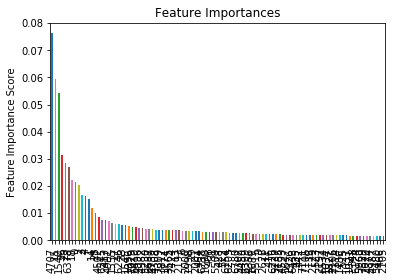

In [28]:
xgb2=XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 num_class = len(np.unique(y_train_encoded)),
 max_depth=7,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, X_train,y_train_encoded)

In [29]:
y_test_pred=xgb2.predict(X_test)

In [30]:
print(precision_score(y_test_encoded,y_test_pred,average='macro'))
print(classification_report(y_test_encoded,y_test_pred))

0.16849108756696016
              precision    recall  f1-score   support

           0       0.21      0.36      0.27      1431
           1       0.11      0.03      0.04      1194
           2       0.17      0.12      0.14      2469
           3       0.19      0.21      0.20      3148
           4       0.16      0.22      0.18      3817
           5       0.16      0.16      0.16      3705
           6       0.15      0.07      0.09      3133
           7       0.16      0.03      0.06      2633
           8       0.13      0.01      0.03      2208
           9       0.14      0.01      0.03      2022
          10       0.29      0.72      0.41      4240

   micro avg       0.21      0.21      0.21     30000
   macro avg       0.17      0.18      0.15     30000
weighted avg       0.18      0.21      0.17     30000



In [31]:
xgb2.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=7, min_child_weight=6, missing=None, n_estimators=2251,
       n_jobs=1, nthread=4, num_class=11, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8)>

In [32]:
np.unique(y_test_pred,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 2414,   280,  1754,  3421,  5350,  3766,  1344,   585,   262,
          202, 10622]))

In [33]:
np.unique(y_test_encoded,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([1431, 1194, 2469, 3148, 3817, 3705, 3133, 2633, 2208, 2022, 4240]))